# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # used for the legend at step duration
import seaborn as sns
import numpy as np
import datetime
import scipy.stats as st
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

from functions import cleaning 

In [2]:
# Disabling a specific type of warning from Jupyter, that I know if mistaken for something else
pd.options.mode.chained_assignment = None 

# Loading dataset

In [3]:
filepath1 = '../Data/df_final_demo.txt' # Client Profiles
filepath2 = '../Data/df_final_web_data_pt_1.txt' # Digital Footprints, part 1
filepath3 = '../Data/df_final_web_data_pt_2.txt' # Digital Footprints, part 2
filepath4 = '../Data/df_final_experiment_clients.txt' # Experiment Roster 

# Loading datasets
df_clients = pd.read_csv(filepath1)
df2 = pd.read_csv(filepath2)
df3 = pd.read_csv(filepath3)
df_roster = pd.read_csv(filepath4)

# Merging part 1 and 2 of Digital Footprints
df_trace = pd.concat([df2, df3], axis=0, ignore_index=True)

# Data cleaning

In [4]:
# Calling the cleaning function I created at the functions.py file
df_clients, df_trace, df_roster, df_clients_with_na = cleaning(df_clients, df_trace, df_roster)

# Client profile and behaviour analysis

#### Clients' age

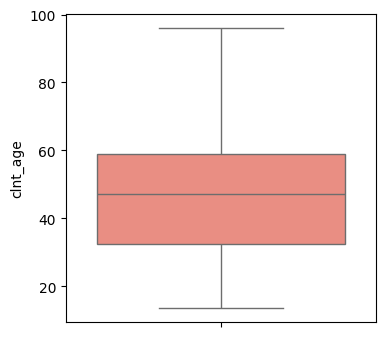

In [5]:
# Box plot with client's age
plt.figure(figsize=(4, 4))
sns.boxplot(data=df_clients['clnt_age'], color='salmon')
plt.show()

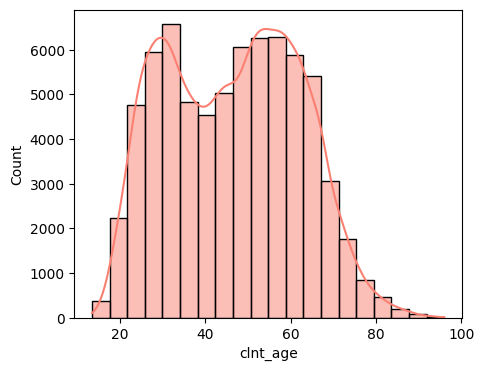

In [6]:
# Histogram with client's age
plt.figure(figsize=(5, 4))
sns.histplot(df_clients['clnt_age'], kde=True, bins=20, color='salmon')
plt.show()

We observe from the boxplot that the clients' age doesn't have outliers.

/var/folders/yt/xx6_vt592x9cgxz0trzlfxp00000gn/T/ipykernel_51265/2430245986.py:27: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.countplot(data=df_clients, x='clnt_age_category', palette=custom_palette, hue='clnt_age_category', legend=False)


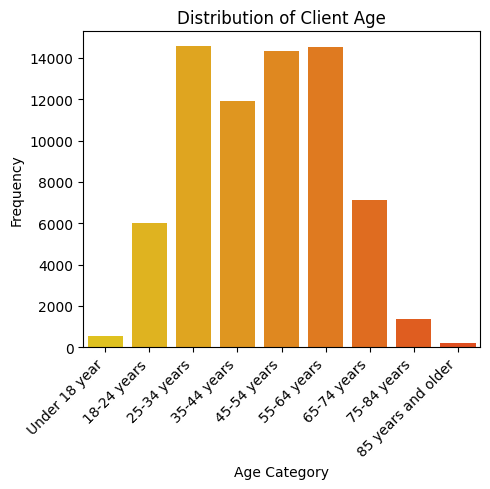

In [7]:
# I want to check the above with some age brackets
bins = [0, 18.0, 25.0, 35.0, 45.0, 55.0, 65.0 , 75.0, 85.0, df_clients['clnt_age'].max()]
labels = ['Under 18 year', '18-24 years', '25-34 years', '35-44 years', '45-54 years', 
          '55-64 years', '65-74 years', '75-84 years', '85 years and older']

df_clients['clnt_age_category'] = pd.cut(df_clients['clnt_age'], bins=bins, labels=labels, include_lowest=True)


# Countplot
# Custom palette for presentation purposes
custom_palette = [ '#FFD700','#FFC400','#FFB100','#FF9E00','#FF8B00','#FF7800','#FF6500','#FF5200','#FF3F00','#FF2C00' ]

plt.figure(figsize=(5, 5)) 
sns.countplot(data=df_clients, x='clnt_age_category', palette=custom_palette, hue='clnt_age_category', legend=False)
plt.xticks(rotation=45, ha='right')

plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.title('Distribution of Client Age')

# Save plot as PNG
plt.tight_layout() 
plt.savefig('client_age_category.png')

plt.show()

It's notable that the clients predominantly fall into two age groups: 25-34 years and 45-64 years. Moreover, the interquartile range (IQR) reinforces this observation, spanning from 32 to 59 years, indicating that the majority of clients are concentrated within this age range.

#### Clients' tenure years

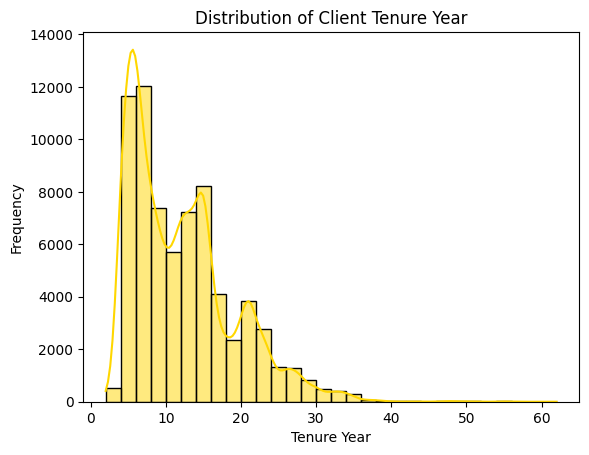

In [8]:
# Histogram with client's tenure years
# Histogram


sns.histplot(df_clients['clnt_tenure_yr'], kde=True, bins=30, color='#FFD700')

plt.xlabel('Tenure Year')
plt.ylabel('Frequency')
plt.title('Distribution of Client Tenure Year')

# Save plot as PNG
plt.savefig('client_tenure_histogram.png')

plt.show()

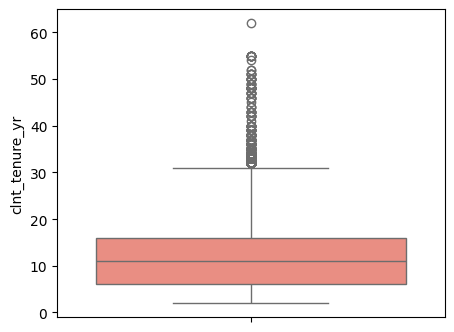

In [9]:
# Box plot with client's tenure years
plt.figure(figsize=(5, 4))
sns.boxplot(data=df_clients['clnt_tenure_yr'], color='salmon')
plt.show()

The distribution of client tenure years is right skewed, and appears to have outliers with higher values. Although outliers are present, in the analysis they will be considered normal, since in the context of an investment management company there can be as long-term clients. The majority of clients have tenures ranging from approximately 6 to 16 years, as indicated by the interquartile range (IQR).

#### Client's gender

Based on the initial exploration, there appears to be a relatively balanced distribution between male and female clients.

#### Interaction with company via call/ platform visit

The vast majority of the clients had some interaction with the company via call or platform visit the last 6 months.

From the intial exploration, with the Pearson correlation analysis, it appears that the most notable linear relationship exists between the number of logins to the site and the number of calls made by the customer within the last 6 months. The Spearman correlation analysis similarly indicates that the strongest association is observed between the number of logins and the number of calls made by customers in the last 6 months, and doesn't reveal any other strong correlation.

/var/folders/yt/xx6_vt592x9cgxz0trzlfxp00000gn/T/ipykernel_51265/694489537.py:14: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.countplot(data=df_clients, x='logons_6_mnth', palette=custom_palette, hue='logons_6_mnth', legend=False)


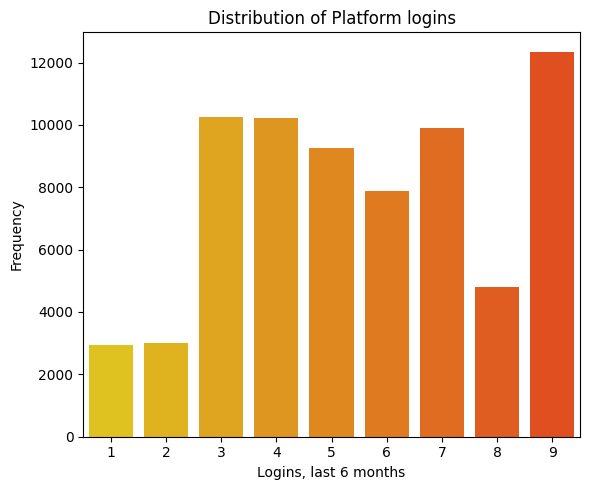

In [10]:
custom_palette = ['#FFD700', '#FFC400','#FFB100', '#FF9E00', '#FF8B00','#FF7800', '#FF6500','#FF5200', '#FF3F00','#FF2C00']
plt.figure(figsize=(6, 5)) 
sns.countplot(data=df_clients, x='logons_6_mnth', palette=custom_palette, hue='logons_6_mnth', legend=False)

plt.xlabel('Logins, last 6 months')
plt.ylabel('Frequency')
plt.title('Distribution of Platform logins')

# Save plot as PNG
plt.tight_layout() 
plt.savefig('client_platform_logins.png')

plt.show()